### Import libraries

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import cv2 

### Create Dataframe

In [2]:
def create_df(type:str,path:str)->pd.DataFrame:
    columns = ['type','shape','pixel','path']
    df = pd.DataFrame(columns=columns)
    for index,img in enumerate(os.listdir(path)):
        img_path = f'{path}/{img}'
        try:
            img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
            df.loc[index]=[type,img.shape,img,img_path]
        except Exception as e:
            print(f'{img_path}:{e}')
    return df

In [3]:
glioma_df=create_df(type='glioma',path='./clean_datasets/glioma')
meningioma_df=create_df(type='meningioma',path='./clean_datasets/meningioma')
pituitary_df=create_df(type='pituitary',path='./clean_datasets/pituitary')
normal_df=create_df(type='normal',path='./clean_datasets/normal')

./clean_datasets/normal/Tr-no_1019.jpg:'NoneType' object has no attribute 'shape'
./clean_datasets/normal/Tr-no_1011.jpg:'NoneType' object has no attribute 'shape'
./clean_datasets/normal/Tr-no_1012.jpg:'NoneType' object has no attribute 'shape'


### Basic Information

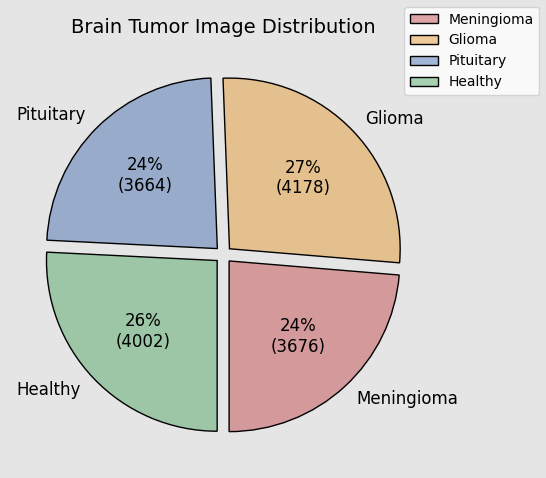

In [4]:
meningioma_count=meningioma_df['type'].size
glioma_count=glioma_df['type'].size
pituitary_count=pituitary_df['type'].size
healthy_count=normal_df['type'].size

labels =[
    'Meningioma',
    'Glioma',
    'Pituitary',
    'Healthy'
]

image_count = [
    meningioma_count,
    glioma_count,
    pituitary_count,
    healthy_count
]
# image_count.sort()

# colors=['#cde1ec','#8ec1da','#f6d6c2','#d47264','#ae282c']

colors = [
    '#C44E5280',#Red
    '#E39C3980',#Orange
    '#4C72B080',#Blue
    '#55A86880',#Green
]

explode=[0.05,0.05,0.05,0.05]

fig, ax = plt.subplots()

def add_label(pct,dataset):
    total = sum(dataset)
    type_count = (pct/100)*total
    return f'{pct:.0f}%\n({type_count:.0f})'

patches, texts, autotexts = ax.pie(
    image_count,
    labels=labels,
    autopct=(lambda pct: add_label(pct,image_count)),
    startangle=270,
    colors=colors,
    explode=explode,
    textprops={'fontsize':12},
    wedgeprops={'edgecolor': 'black'},
)


ax.set_title('Brain Tumor Image Distribution',fontsize=14)
fig.patch.set_facecolor('#e5e5e5')
fig.tight_layout()
fig.legend(labels=labels,loc="upper right")
plt.setp(autotexts,color='black')

plt.show()

### Calculate mean pixel image

In [15]:
meningioma_mean = np.mean(meningioma_df['pixel'], axis=0)
glioma_mean = np.mean(glioma_df['pixel'], axis=0)
pituitary_mean = np.mean(pituitary_df['pixel'], axis=0)

In [16]:
test = pd.Series(meningioma_mean.flatten())
test.value_counts()

0.065016    289
0.052775    282
0.041077    281
0.063656    279
0.010881    278
           ... 
0.049510    211
0.019587    210
0.026931    210
0.039717    210
0.027203    203
Name: count, Length: 256, dtype: int64

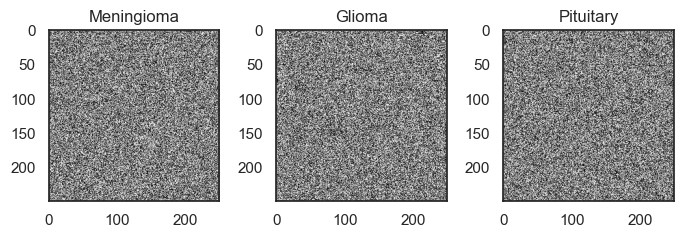

In [19]:
# sns.set_theme(style='white')
fig, axes = plt.subplots(1,3,figsize=(7,10))

colors = [
    '#C44E5280',#Red
    '#E39C3980',#Orange
    '#4C72B080',#Blue
    '#55A86880',#Green
]

axes[0].imshow(meningioma_mean,'gray')

axes[1].imshow(glioma_mean,'gray')

axes[2].imshow(pituitary_mean,'gray')

axes[0].set_title('Meningioma')

axes[1].set_title('Glioma')

axes[2].set_title('Pituitary')

plt.tight_layout()
plt.show()

#clean_datasets/pituitary/1531.jpg

### Investigate Tumor Types

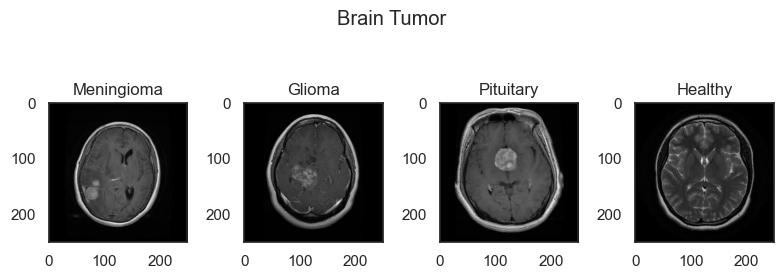

In [34]:
sns.set_theme(style='white')
fig, axes = plt.subplots(1,4,figsize=(8,3))

meningioma_img = cv2.imread('./clean_datasets/meningioma/Tr-meTr_0006.jpg',cv2.IMREAD_GRAYSCALE)
glioma_img = cv2.imread('./clean_datasets/glioma/Tr-gl_0379.jpg',cv2.IMREAD_GRAYSCALE)
pituitary_img = cv2.imread('./clean_datasets/pituitary/Tr-pi_1047.jpg',cv2.IMREAD_GRAYSCALE)
healthy_img = cv2.imread('./clean_datasets/normal/image(287).jpg',cv2.IMREAD_GRAYSCALE)

axes[0].imshow(meningioma_img,'gray')
axes[0].set_title('Meningioma')

axes[1].imshow(glioma_img,'gray')
axes[1].set_title('Glioma')

axes[2].imshow(pituitary_img,'gray')
axes[2].set_title('Pituitary')

axes[3].imshow(healthy_img,'gray')
axes[3].set_title('Healthy')

fig.suptitle('Brain Tumor')
fig.tight_layout()

plt.show()

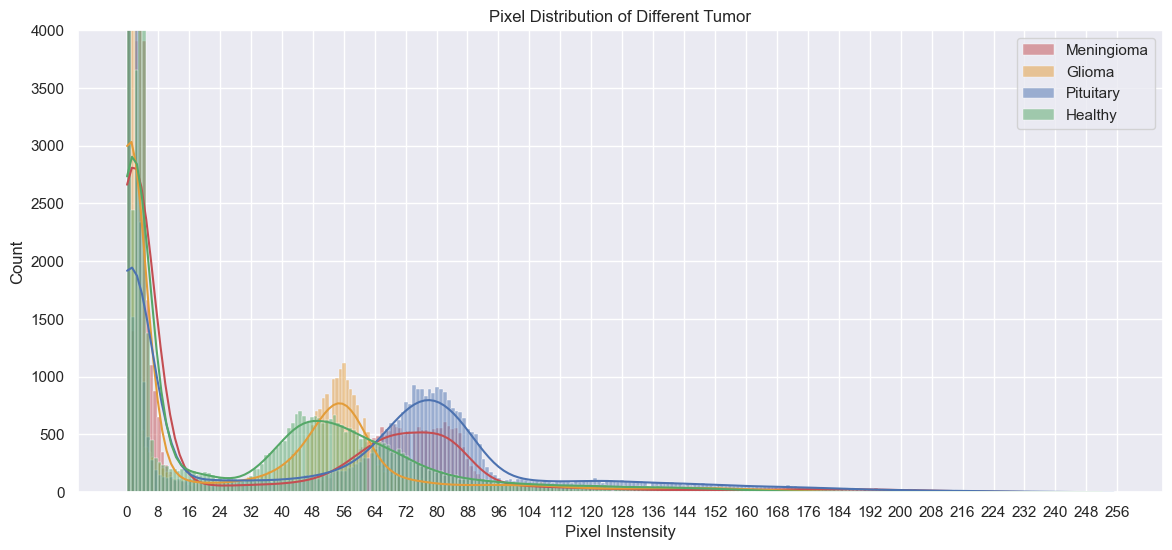

In [29]:
sns.set_theme(style='darkgrid')
colors = [
    '#C44E5280',#Red
    '#E39C3980',#Orange
    '#4C72B080',#Blue
    '#55A86880',#Green
]

plt.figure(figsize=(14,6))
sns.histplot(meningioma_img.flatten(),bins=256,label='Meningioma',color=colors[0],alpha=0.5,kde=True)
sns.histplot(glioma_img.flatten(),bins=256,label='Glioma',color=colors[1],alpha=0.5,kde=True)
sns.histplot(pituitary_img.flatten(),bins=256,label='Pituitary',color=colors[2],alpha=0.5,kde=True)
sns.histplot(healthy_img.flatten(),bins=256,label='Healthy',color=colors[3],alpha=0.5,kde=True)

plt.legend(loc='upper right')
plt.title('Pixel Distribution of Different Tumor')
plt.xlabel('Pixel Instensity')
plt.ylabel('Count')
plt.xticks(np.arange(0,264,8))
plt.ylim(0, 4000)
plt.show()

In [12]:
def filter_intensity(img,low,high):
    flatten_img =img.flatten()
    for i in range(0,len(flatten_img)):
        if high>flatten_img[i]>low:
            continue
        flatten_img[i]=0
    return flatten_img.reshape(250,250)

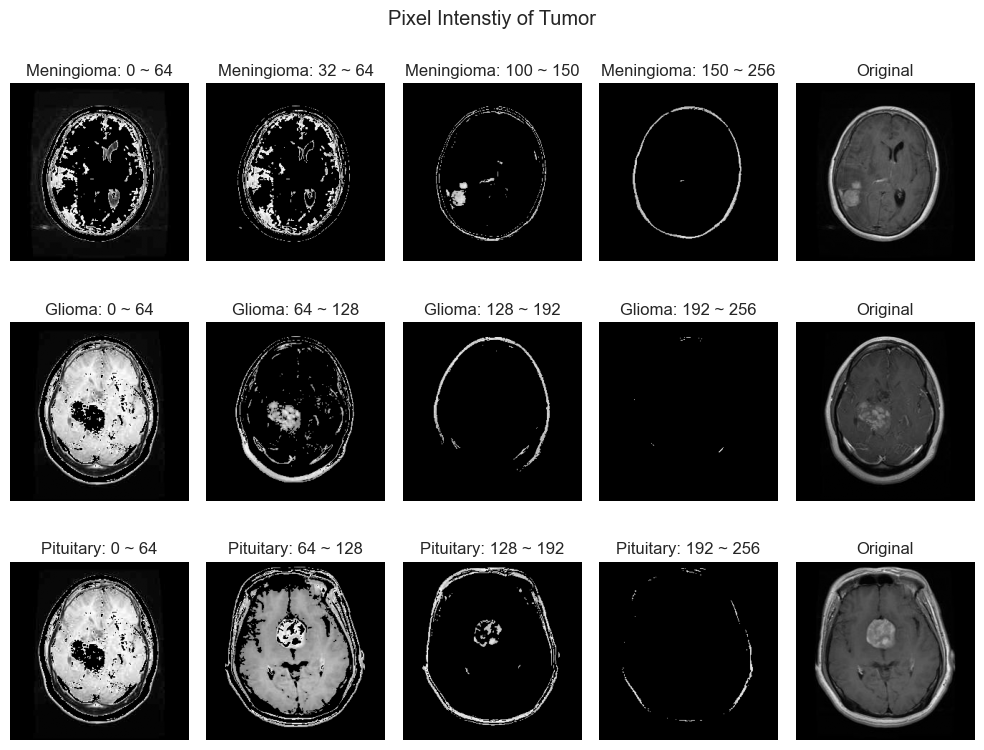

In [35]:
fig, axes = plt.subplots(3,5,figsize=(10,8))

axes[0][0].imshow(filter_intensity(meningioma_img,0,64),'gray')
axes[0][1].imshow(filter_intensity(meningioma_img,32,64),'gray')
axes[0][2].imshow(filter_intensity(meningioma_img,100,150),'gray')
axes[0][3].imshow(filter_intensity(meningioma_img,150,256),'gray')
axes[0][4].imshow(meningioma_img,'gray')

axes[0][0].set_axis_off()
axes[0][1].set_axis_off()
axes[0][2].set_axis_off()
axes[0][3].set_axis_off()
axes[0][4].set_axis_off()

axes[1][0].imshow(filter_intensity(glioma_img,0,64),'gray')
axes[1][1].imshow(filter_intensity(glioma_img,64,128),'gray')
axes[1][2].imshow(filter_intensity(glioma_img,128,192),'gray')
axes[1][3].imshow(filter_intensity(glioma_img,192,256),'gray')
axes[1][4].imshow(glioma_img,'gray')

axes[1][0].set_axis_off()
axes[1][1].set_axis_off()
axes[1][2].set_axis_off()
axes[1][3].set_axis_off()
axes[1][4].set_axis_off()

axes[2][0].imshow(filter_intensity(glioma_img,0,64),'gray')
axes[2][1].imshow(filter_intensity(pituitary_img,64,128),'gray')
axes[2][2].imshow(filter_intensity(pituitary_img,128,192),'gray')
axes[2][3].imshow(filter_intensity(pituitary_img,192,256),'gray')
axes[2][4].imshow(pituitary_img,'gray')


axes[2][0].set_axis_off()
axes[2][1].set_axis_off()
axes[2][2].set_axis_off()
axes[2][3].set_axis_off()
axes[2][4].set_axis_off()

fig.suptitle('Pixel Intenstiy of Tumor')
axes[0][0].set_title('Meningioma: 0 ~ 64')
axes[0][1].set_title('Meningioma: 32 ~ 64')
axes[0][2].set_title('Meningioma: 100 ~ 150')
axes[0][3].set_title('Meningioma: 150 ~ 256')
axes[0][4].set_title('Original')

axes[1][0].set_title('Glioma: 0 ~ 64')
axes[1][1].set_title('Glioma: 64 ~ 128')
axes[1][2].set_title('Glioma: 128 ~ 192')
axes[1][3].set_title('Glioma: 192 ~ 256')
axes[1][4].set_title('Original')

axes[2][0].set_title('Pituitary: 0 ~ 64')
axes[2][1].set_title('Pituitary: 64 ~ 128')
axes[2][2].set_title('Pituitary: 128 ~ 192')
axes[2][3].set_title('Pituitary: 192 ~ 256')
axes[2][4].set_title('Original')

fig.tight_layout()

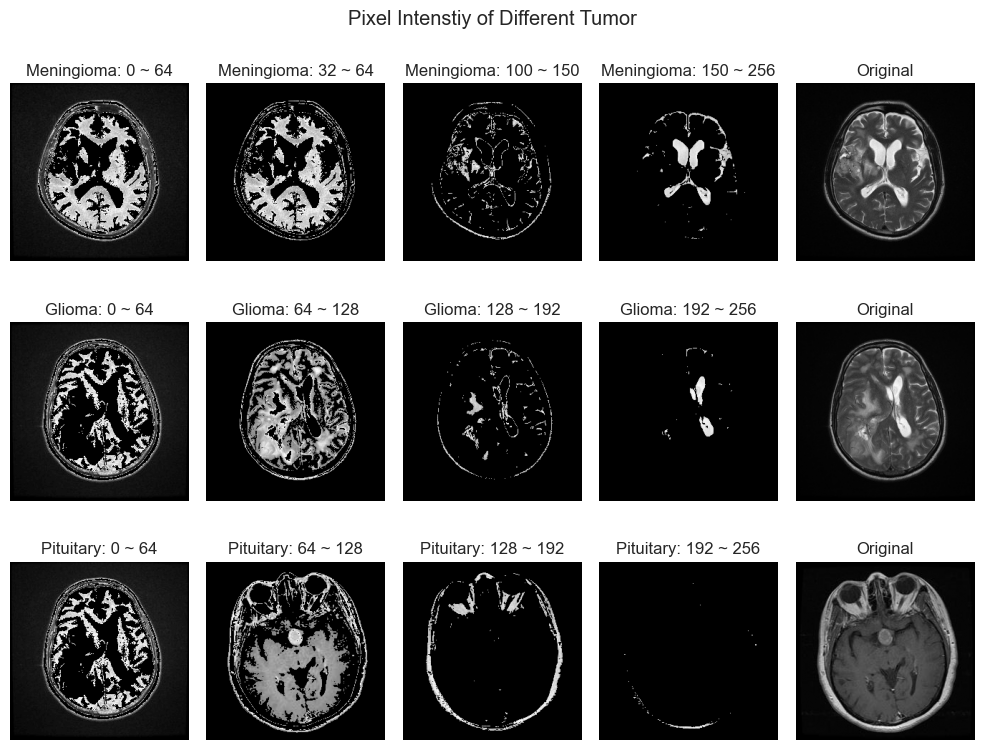

In [ ]:
sns.set_theme(style='white')
meningioma_img = cv2.imread('clean_datasets/meningioma/meningioma_80.jpg',cv2.IMREAD_GRAYSCALE)
glioma_img = cv2.imread('clean_datasets/glioma/glioma_70.jpg',cv2.IMREAD_GRAYSCALE)
pituitary_img = cv2.imread('clean_datasets/pituitary/Te-pi_0015.jpg',cv2.IMREAD_GRAYSCALE)
healthy_img = cv2.imread('./clean_datasets/normal/image(287).jpg',cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(3,5,figsize=(10,8))

axes[0][0].imshow(filter_intensity(meningioma_img,0,64),'gray')
axes[0][1].imshow(filter_intensity(meningioma_img,32,64),'gray')
axes[0][2].imshow(filter_intensity(meningioma_img,100,150),'gray')
axes[0][3].imshow(filter_intensity(meningioma_img,150,256),'gray')
axes[0][4].imshow(meningioma_img,'gray')

axes[0][0].set_axis_off()
axes[0][1].set_axis_off()
axes[0][2].set_axis_off()
axes[0][3].set_axis_off()
axes[0][4].set_axis_off()

axes[1][0].imshow(filter_intensity(glioma_img,0,64),'gray')
axes[1][1].imshow(filter_intensity(glioma_img,64,128),'gray')
axes[1][2].imshow(filter_intensity(glioma_img,128,192),'gray')
axes[1][3].imshow(filter_intensity(glioma_img,192,256),'gray')
axes[1][4].imshow(glioma_img,'gray')

axes[1][0].set_axis_off()
axes[1][1].set_axis_off()
axes[1][2].set_axis_off()
axes[1][3].set_axis_off()
axes[1][4].set_axis_off()

axes[2][0].imshow(filter_intensity(glioma_img,0,64),'gray')
axes[2][1].imshow(filter_intensity(pituitary_img,64,128),'gray')
axes[2][2].imshow(filter_intensity(pituitary_img,128,192),'gray')
axes[2][3].imshow(filter_intensity(pituitary_img,192,256),'gray')
axes[2][4].imshow(pituitary_img,'gray')


axes[2][0].set_axis_off()
axes[2][1].set_axis_off()
axes[2][2].set_axis_off()
axes[2][3].set_axis_off()
axes[2][4].set_axis_off()

fig.suptitle('Pixel Intenstiy of Tumor')
axes[0][0].set_title('Meningioma: 0 ~ 64')
axes[0][1].set_title('Meningioma: 32 ~ 64')
axes[0][2].set_title('Meningioma: 100 ~ 150')
axes[0][3].set_title('Meningioma: 150 ~ 256')
axes[0][4].set_title('Original')

axes[1][0].set_title('Glioma: 0 ~ 64')
axes[1][1].set_title('Glioma: 64 ~ 128')
axes[1][2].set_title('Glioma: 128 ~ 192')
axes[1][3].set_title('Glioma: 192 ~ 256')
axes[1][4].set_title('Original')

axes[2][0].set_title('Pituitary: 0 ~ 64')
axes[2][1].set_title('Pituitary: 64 ~ 128')
axes[2][2].set_title('Pituitary: 128 ~ 192')
axes[2][3].set_title('Pituitary: 192 ~ 256')
axes[2][4].set_title('Original')

fig.tight_layout()

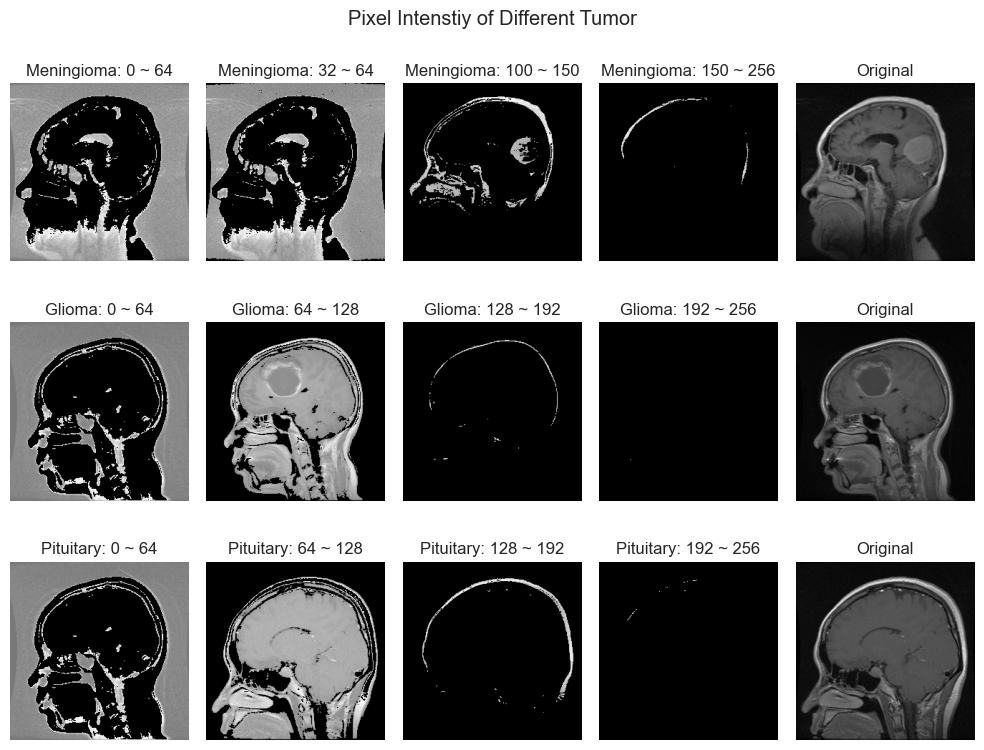

In [26]:
sns.set_theme(style='white')
meningioma_img = cv2.imread('clean_datasets/meningioma/423.jpg',cv2.IMREAD_GRAYSCALE)
glioma_img = cv2.imread('clean_datasets/glioma/234.jpg',cv2.IMREAD_GRAYSCALE)
pituitary_img = cv2.imread('clean_datasets/pituitary/1823.jpg',cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(3,5,figsize=(10,8))

axes[0][0].imshow(filter_intensity(meningioma_img,0,64),'gray')
axes[0][1].imshow(filter_intensity(meningioma_img,32,64),'gray')
axes[0][2].imshow(filter_intensity(meningioma_img,100,150),'gray')
axes[0][3].imshow(filter_intensity(meningioma_img,150,256),'gray')
axes[0][4].imshow(meningioma_img,'gray')

axes[0][0].set_axis_off()
axes[0][1].set_axis_off()
axes[0][2].set_axis_off()
axes[0][3].set_axis_off()
axes[0][4].set_axis_off()

axes[1][0].imshow(filter_intensity(glioma_img,0,64),'gray')
axes[1][1].imshow(filter_intensity(glioma_img,64,128),'gray')
axes[1][2].imshow(filter_intensity(glioma_img,128,192),'gray')
axes[1][3].imshow(filter_intensity(glioma_img,192,256),'gray')
axes[1][4].imshow(glioma_img,'gray')

axes[1][0].set_axis_off()
axes[1][1].set_axis_off()
axes[1][2].set_axis_off()
axes[1][3].set_axis_off()
axes[1][4].set_axis_off()

axes[2][0].imshow(filter_intensity(glioma_img,0,64),'gray')
axes[2][1].imshow(filter_intensity(pituitary_img,64,128),'gray')
axes[2][2].imshow(filter_intensity(pituitary_img,128,192),'gray')
axes[2][3].imshow(filter_intensity(pituitary_img,192,256),'gray')
axes[2][4].imshow(pituitary_img,'gray')


axes[2][0].set_axis_off()
axes[2][1].set_axis_off()
axes[2][2].set_axis_off()
axes[2][3].set_axis_off()
axes[2][4].set_axis_off()

fig.suptitle('Pixel Intenstiy of Different Tumor')
axes[0][0].set_title('Meningioma: 0 ~ 64')
axes[0][1].set_title('Meningioma: 32 ~ 64')
axes[0][2].set_title('Meningioma: 100 ~ 150')
axes[0][3].set_title('Meningioma: 150 ~ 256')
axes[0][4].set_title('Original')

axes[1][0].set_title('Glioma: 0 ~ 64')
axes[1][1].set_title('Glioma: 64 ~ 128')
axes[1][2].set_title('Glioma: 128 ~ 192')
axes[1][3].set_title('Glioma: 192 ~ 256')
axes[1][4].set_title('Original')

axes[2][0].set_title('Pituitary: 0 ~ 64')
axes[2][1].set_title('Pituitary: 64 ~ 128')
axes[2][2].set_title('Pituitary: 128 ~ 192')
axes[2][3].set_title('Pituitary: 192 ~ 256')
axes[2][4].set_title('Original')

fig.tight_layout()


### Investiage Image perpective

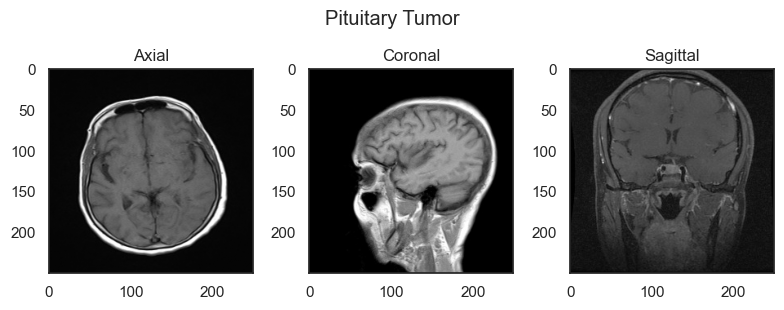

In [154]:
sns.set_theme(style='white')
fig, axes = plt.subplots(1,3,figsize=(8,3))

axial_img = cv2.imread('clean_datasets/pituitary/pituitary_4.jpg',cv2.IMREAD_GRAYSCALE)
coronal_img = cv2.imread('clean_datasets/pituitary/pituitary_39.jpg',cv2.IMREAD_GRAYSCALE)
sagittal_img = cv2.imread('clean_datasets/pituitary/1588.jpg',cv2.IMREAD_GRAYSCALE)

axes[0].imshow(axial_img,'gray')
axes[0].set_title('Axial')

axes[1].imshow(coronal_img,'gray')
axes[1].set_title('Coronal')

axes[2].imshow(sagittal_img,'gray')

axes[2].set_title('Sagittal')

fig.suptitle('Pituitary Tumor')
fig.tight_layout()

plt.show()

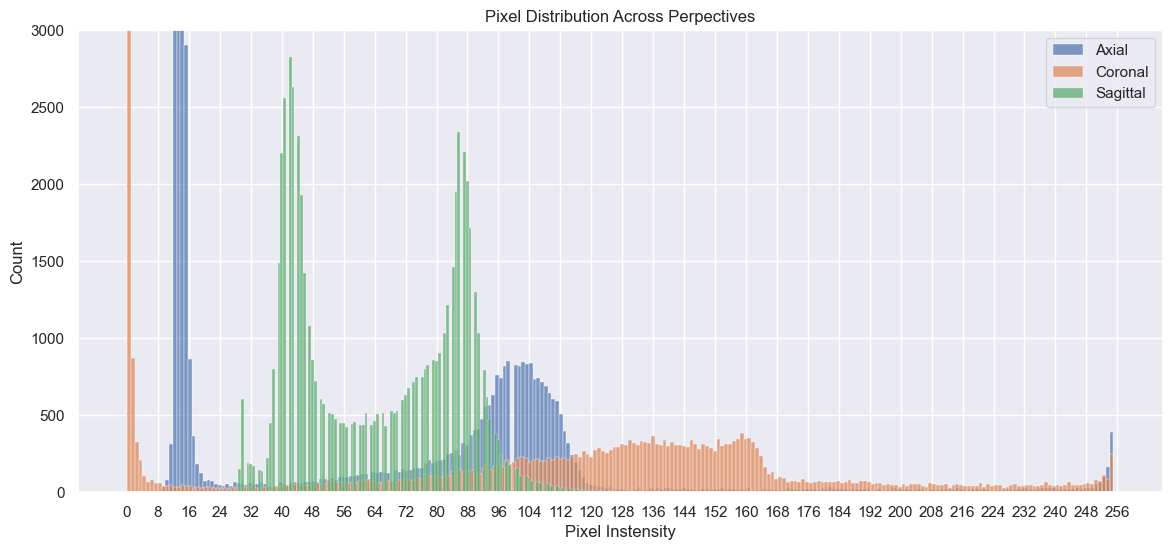

In [172]:
sns.set_theme(style='darkgrid')

plt.figure(figsize=(14,6))
sns.histplot(axial_img.flatten(),bins=256,label='Axial',alpha=0.7)
sns.histplot(coronal_img.flatten(),bins=256,label='Coronal',alpha=0.7)
sns.histplot(sagittal_img.flatten(),bins=256,label='Sagittal',alpha=0.7)

plt.legend(loc='upper right')
plt.title('Pixel Distribution Across Perpectives')
plt.xlabel('Pixel Instensity')
plt.ylabel('Count')
plt.xticks(np.arange(0,264,8))
plt.ylim(0, 3000)
plt.show()